In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
from datetime import datetime
import matplotlib.cm as cm
from scipy import stats

%matplotlib inline

In [4]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.duplicated().any()

False

In [122]:
df_description = df.drop(['Date'],axis=1).describe().round(3)
df_description

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000
mean,23.000,1046.965,0.070,60.664,3.359,171.578,7.999
std,12.988,564.367,0.255,18.445,0.459,39.357,1.876
min,1.000,209.986,0.000,-2.060,2.472,126.060,3.879
25%,12.000,553.350,0.000,47.460,2.933,131.740,6.891
50%,23.000,960.746,0.000,62.670,3.445,182.620,7.874
75%,34.000,1420.158,0.000,74.940,3.735,212.745,8.622
max,45.000,3818.686,1.000,100.140,4.468,227.230,14.313


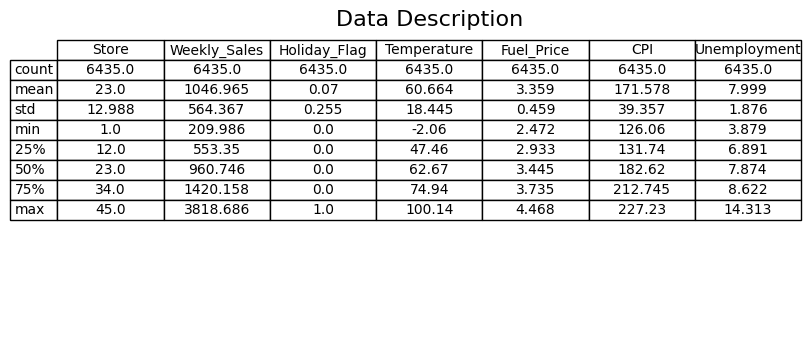

In [130]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

table = ax.table(cellText=df_description.values,
                 colLabels=df_description.columns,
                 rowLabels=df_description.index,
                 cellLoc='center',
                 loc='upper center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Data Description',fontsize=16)
plt.savefig('data description.png',bbox_inches='tight',facecolor='white')
plt.show()

In [9]:
years = dates.YearLocator()
months = dates.MonthLocator()
years_fmt = dates.DateFormatter('%b %Y')

df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

#for simplicity, we use 1k unit in sales
df['Weekly_Sales'] = round(df['Weekly_Sales'] / 1000, 3)
df['CPI'] = round(df['CPI'], 2)

df2 = df.copy()

#build panel data sorting by store and date
df2 = df2.sort_values(by = 'Date')
panel = pd.pivot_table(df2, values = ['Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'], index = ['Store', 'Date']).reset_index()
panel['Month'] = panel['Date'].dt.month
panel['Year'] = panel['Date'].dt.year

panel.head()

,Store,Date,CPI,Fuel_Price,Holiday_Flag,Temperature,Unemployment,Weekly_Sales,Month,Year
0,1,2010-02-05,211.10,2.572,0.0,42.31,8.106,1643.691,2,2010
1,1,2010-02-12,211.24,2.548,1.0,38.51,8.106,1641.957,2,2010
2,1,2010-02-19,211.29,2.514,0.0,39.93,8.106,1611.968,2,2010
3,1,2010-02-26,211.32,2.561,0.0,46.63,8.106,1409.728,2,2010
4,1,2010-03-05,211.35,2.625,0.0,46.50,8.106,1554.807,3,2010


In [10]:
panel.drop(['Month', 'Year', 'Store'], axis = 1).describe()

,Date,CPI,Fuel_Price,Holiday_Flag,Temperature,Unemployment,Weekly_Sales
count,6435,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,2011-06-17 00:00:00,171.578468,3.358607,0.069930,60.663782,7.999151,1046.964876
min,2010-02-05 00:00:00,126.060000,2.472000,0.000000,-2.060000,3.879000,209.986000
25%,2010-10-08 00:00:00,131.740000,2.933000,0.000000,47.460000,6.891000,553.350000
50%,2011-06-17 00:00:00,182.620000,3.445000,0.000000,62.670000,7.874000,960.746000
75%,2012-02-24 00:00:00,212.745000,3.735000,0.000000,74.940000,8.622000,1420.158500
max,2012-10-26 00:00:00,227.230000,4.468000,1.000000,100.140000,14.313000,3818.686000
std,NaN,39.356697,0.459020,0.255049,18.444933,1.875885,564.366622


E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

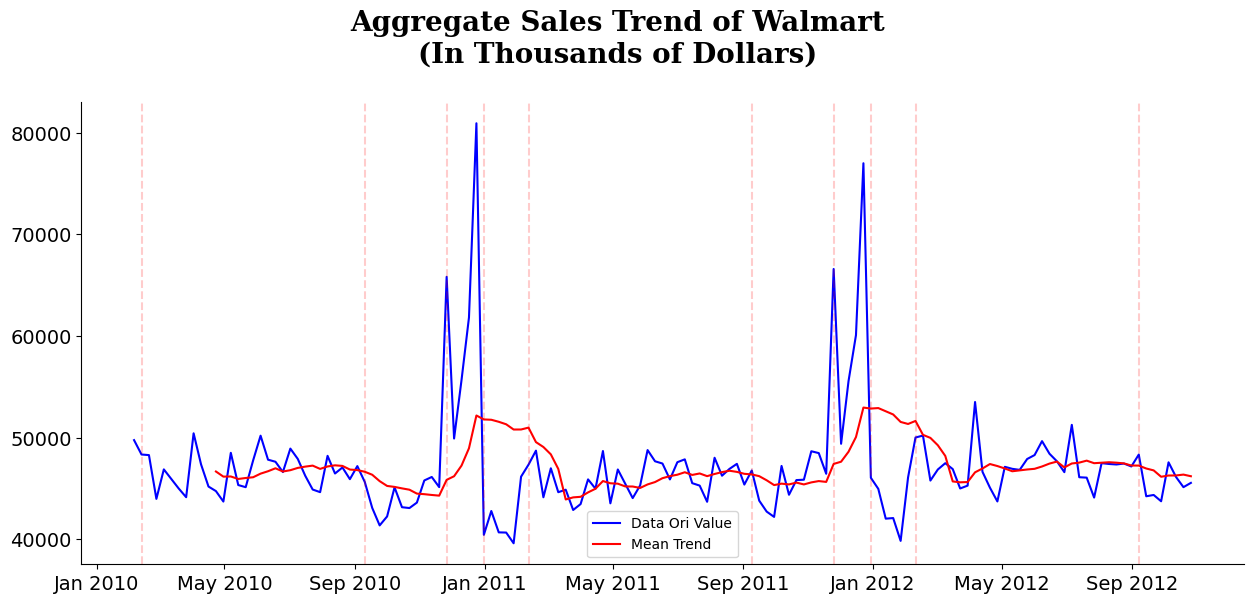

In [19]:
#Aggregate Sales for the whole Walmart Store
holiday_date = pd.to_datetime(['2010-02-12', '2010-09-10',
       '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09',
       '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'])
locate = pd.to_datetime('2011-05-06')

agg_sales = panel.groupby('Date')['Weekly_Sales'].sum().reset_index()

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.lineplot(x = agg_sales['Date'], y = agg_sales['Weekly_Sales'], ax = ax, label = 'Data Ori Value',color='blue')
sns.lineplot(x = agg_sales['Date'], y = agg_sales['Weekly_Sales'].rolling(12).mean(), ax = ax, 
             label = 'Mean Trend',color='red')

for i in holiday_date:
    ax.axvline(i, color = 'r', alpha = 0.2, ls='--')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.text(locate, 87000, 'Aggregate Sales Trend of Walmart\n(In Thousands of Dollars)', fontsize = 20, 
        fontweight = 'bold', fontfamily = 'serif', color = 'black', ha = 'center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_major_formatter(years_fmt)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('sale trend.png',bbox_inches='tight',facecolor='white')
plt.show()

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


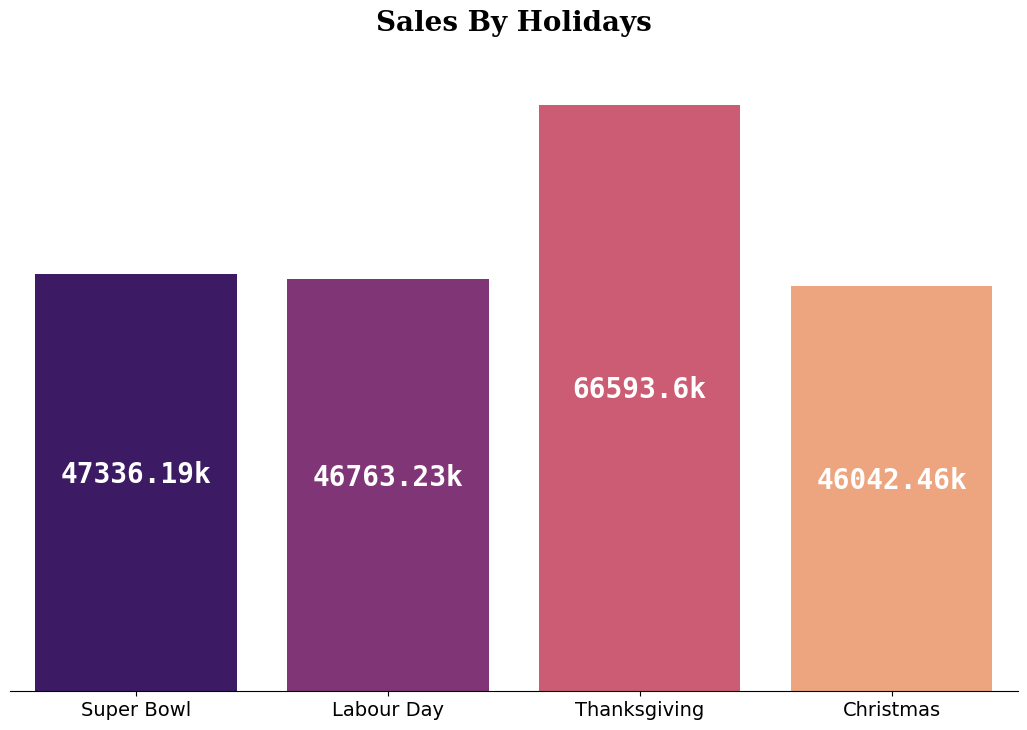

In [26]:
#Detail about sales in holiday, are thanksgiving holiday have highest sales?

#Defining specific holiday
super_bowl = ['2010-02-12', '2011-02-11', '2012-02-10']
labour_day = ['2010-09-10', '2011-09-09', '2012-09-07']
thanksgiving = ['2010-11-26', '2011-11-25', '2012-11-23']
christmas = ['2010-12-31', '2011-12-30', '2012-12-28']

super_bowl_sales = df[df['Date'] == '2011-02-11']['Weekly_Sales'].sum()
labour_day_sales = df[df['Date'] == '2011-09-09']['Weekly_Sales'].sum()
thanksgiving_sales = df[df['Date'] == '2011-11-25']['Weekly_Sales'].sum()
christmas_sales = df[df['Date'] == '2011-12-30']['Weekly_Sales'].sum()

data = {'Super Bowl': super_bowl_sales,'Labour Day': labour_day_sales, 
        'Thanksgiving': thanksgiving_sales,'Christmas': christmas_sales}

holiday_sales = round(pd.Series(data),2)

fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.barplot(x = holiday_sales.index, y = holiday_sales, ax = ax, palette = 'magma')

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
ax.set_yticks([])
ax.set_ylabel('')
for ind, val in enumerate(holiday_sales):
    ax.text(x = ind, y = val/2, s = f'{str(val)}k', fontsize = 20, fontweight = 'bold', ha = 'center', 
            fontfamily = 'monospace', color = 'white')
ax.text(1.5, 75000, 'Sales By Holidays', fontsize = 20, fontweight = 'bold', 
            fontfamily = 'serif', color = 'black', ha = 'center')
plt.xticks(fontsize=14)
plt.savefig('sales by holiday.png',bbox_inches='tight',facecolor='white')

plt.show()

In [28]:
pivot_table = pd.pivot_table(panel, values = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
                             index = 'Date', aggfunc = {'Weekly_Sales': np.sum, 'Temperature': np.mean, 'Fuel_Price': np.mean,
                                                        'CPI': np.mean, 'Unemployment': np.mean}).reset_index()
pivot_table['Month'] = pivot_table['Date'].dt.month
pivot_table['Year'] = pivot_table['Date'].dt.year
pivot_table.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1296\1368894170.py:1: FutureWarning: The provided callable <function sum at 0x0000022199A6D900> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  pivot_table = pd.pivot_table(panel, values = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
C:\Users\User\AppData\Local\Temp\ipykernel_1296\1368894170.py:1: FutureWarning: The provided callable <function mean at 0x0000022199A6E830> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  pivot_table = pd.pivot_table(panel, values = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],


,Date,CPI,Fuel_Price,Temperature,Unemployment,Weekly_Sales,Month,Year
0,2010-02-05,167.729778,2.717844,34.037333,8.619311,49750.741,2,2010
1,2010-02-12,167.826889,2.694022,34.151333,8.619311,48336.676,2,2010
2,2010-02-19,167.873778,2.672067,37.719778,8.619311,48276.996,2,2010
3,2010-02-26,167.910444,2.683933,39.243556,8.619311,43968.572,2,2010
4,2010-03-05,167.949111,2.731200,42.917333,8.619311,46871.469,3,2010


E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

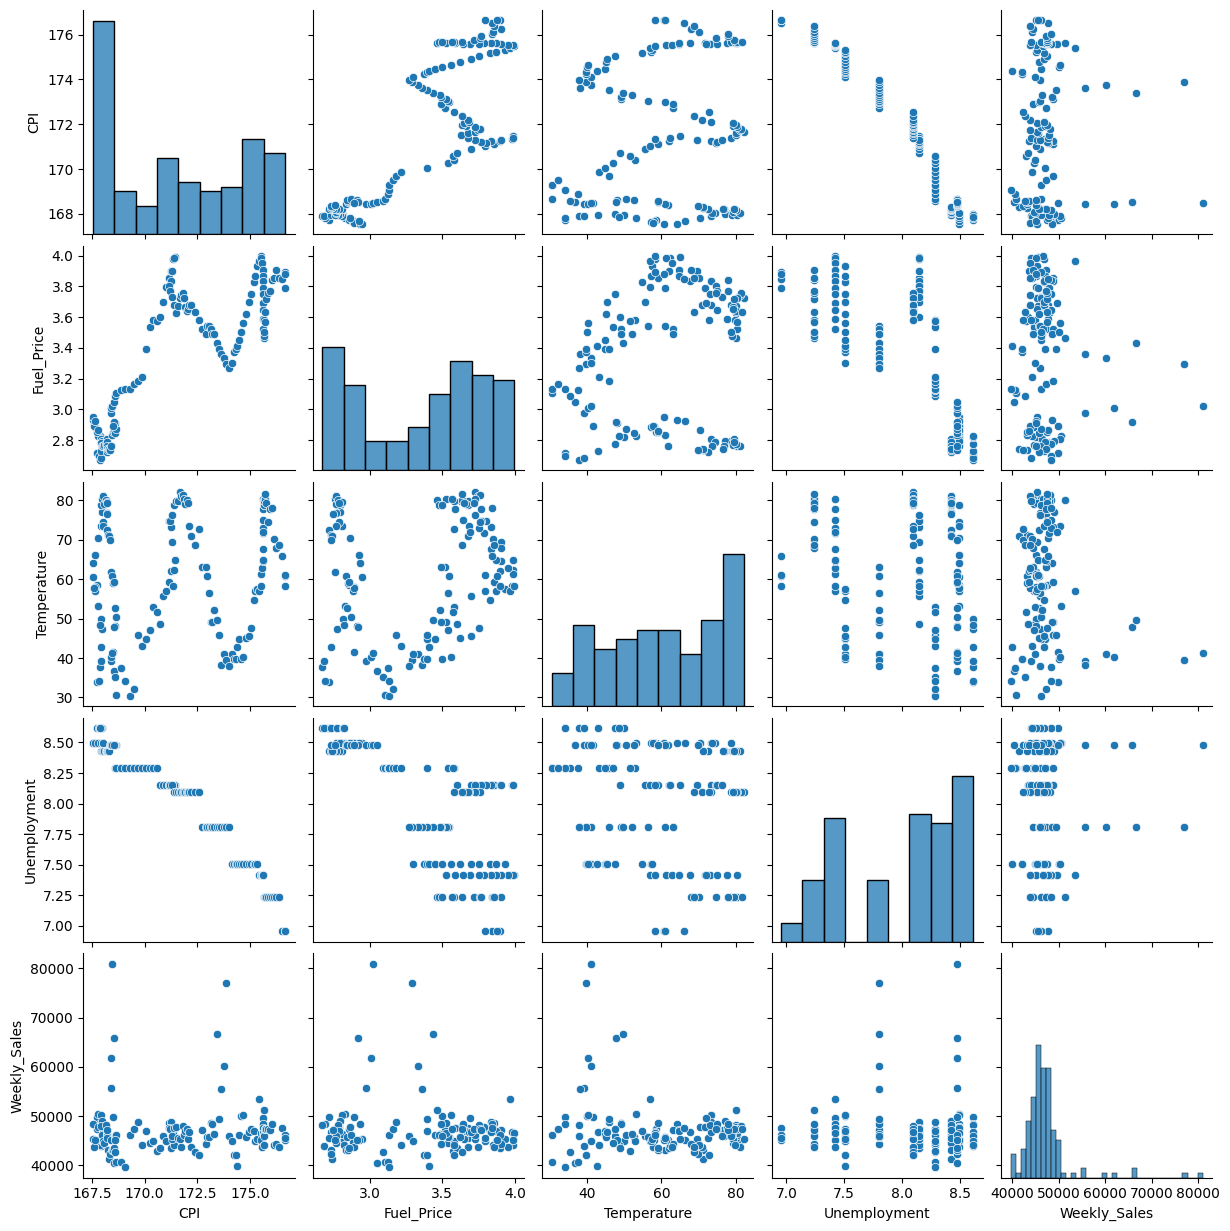

In [29]:
sns.pairplot(pivot_table.drop(['Month', 'Year'], axis = 1))

In [38]:
##correlation table to check correlation
corr_df =  pivot_table.drop(['Month', 'Year'], axis = 1).corr()
corr_df = corr_df.round(4)
corr_df

,Date,CPI,Fuel_Price,Temperature,Unemployment,Weekly_Sales
Date,1.0000,0.9829,0.8275,0.1773,-0.9656,0.0325
CPI,0.9829,1.0000,0.8247,0.1594,-0.9774,0.0234
Fuel_Price,0.8275,0.8247,1.0000,0.2058,-0.7472,-0.0567
Temperature,0.1773,0.1594,0.2058,1.0000,-0.1685,-0.1592
Unemployment,-0.9656,-0.9774,-0.7472,-0.1685,1.0000,0.0035
Weekly_Sales,0.0325,0.0234,-0.0567,-0.1592,0.0035,1.0000


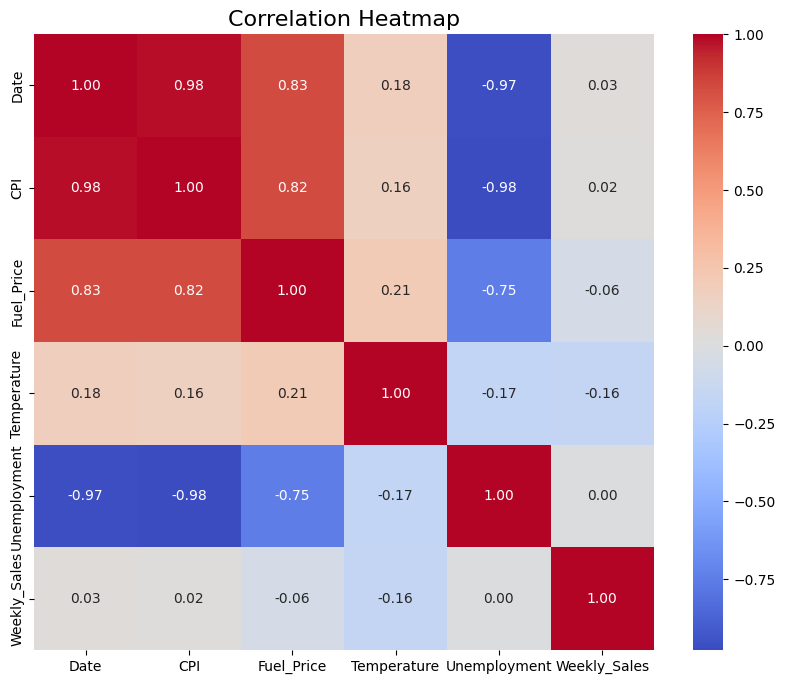

In [90]:
#correlaiton heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('heatmap.png',bbox_inches='tight',facecolor='white')
plt.show()

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


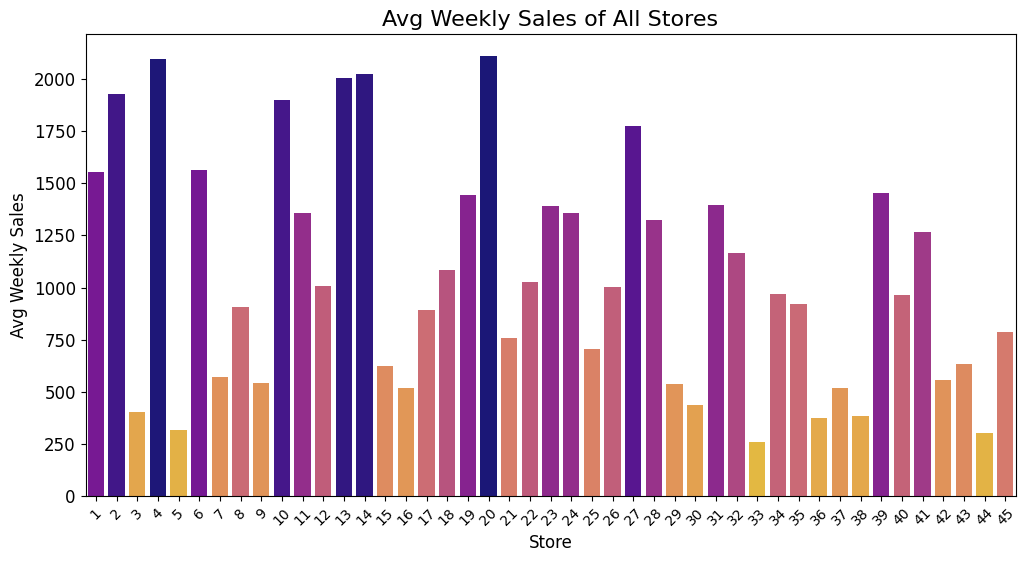

In [74]:
##identifying top performing and least performing stores by weekly sales
Store_avg_Sales=df.groupby(by=['Store']).agg({'Weekly_Sales':'mean'}).reset_index().rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'})

colors_sales = cm.plasma_r(Store_avg_Sales['Avg_Weekly_Sales'] / Store_avg_Sales['Avg_Weekly_Sales'].max())

plt.figure(figsize=(12, 6))
sns.barplot(data=Store_avg_Sales, x='Store', y='Avg_Weekly_Sales', palette=colors_sales)
plt.xlabel('Store',fontsize=12)
plt.ylabel('Avg Weekly Sales',fontsize=12)
plt.title('Avg Weekly Sales of All Stores',fontsize=16)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=12)
plt.savefig('avg weekly sales of stores.png',bbox_inches='tight',facecolor='white')
plt.show()

It seems that sales have less correlation with macroeconomic condition. Possible reason of this realtionship that because we use weekly data and macroeconomic variables like CPI, unemployment, fuel price have slow/rigid change in the short run.

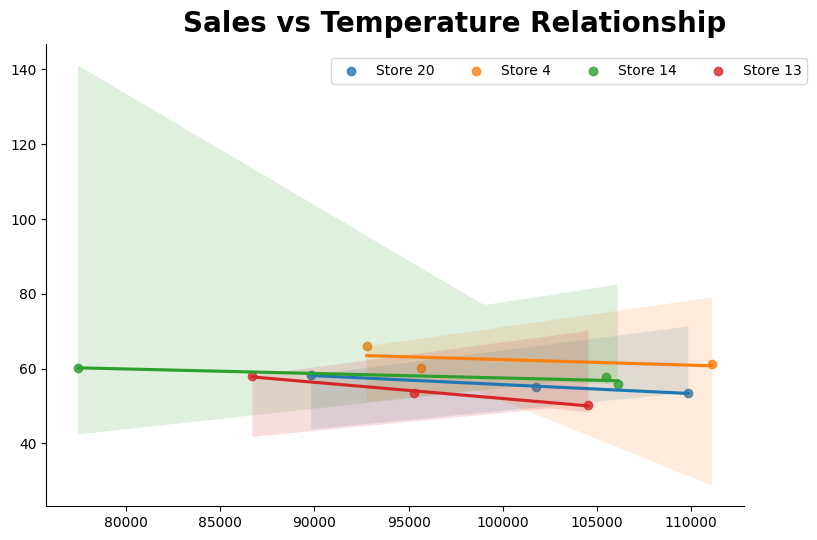

In [114]:
##checking sales and temperature relationship and dependency on each other for top 4 performing stores
sales_store = panel.groupby('Store')['Weekly_Sales'].sum().reset_index()
sales_store = sales_store.sort_values('Weekly_Sales', ascending = False)
store_list = list(sales_store['Store'][:4])

sales = panel.groupby(['Store', 'Year'])['Weekly_Sales'].sum()
temp = panel.groupby(['Store', 'Year'])['Temperature'].mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 6))

for sto in store_list:
    sns.regplot(x = sales[sto].values, y = temp[sto].values, label = sto)
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Store 20', 'Store 4', 'Store 14', 'Store 13'], ncol = 4, bbox_to_anchor = (0.75, 0.9), 
          loc = 'lower center')

ax.text(83000, 150, "Sales vs Temperature Relationship" , color = 'black', fontsize = 20, fontweight = 'bold')
plt.savefig('sales vs temp.png',bbox_inches='tight',facecolor='white')
plt.show()

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


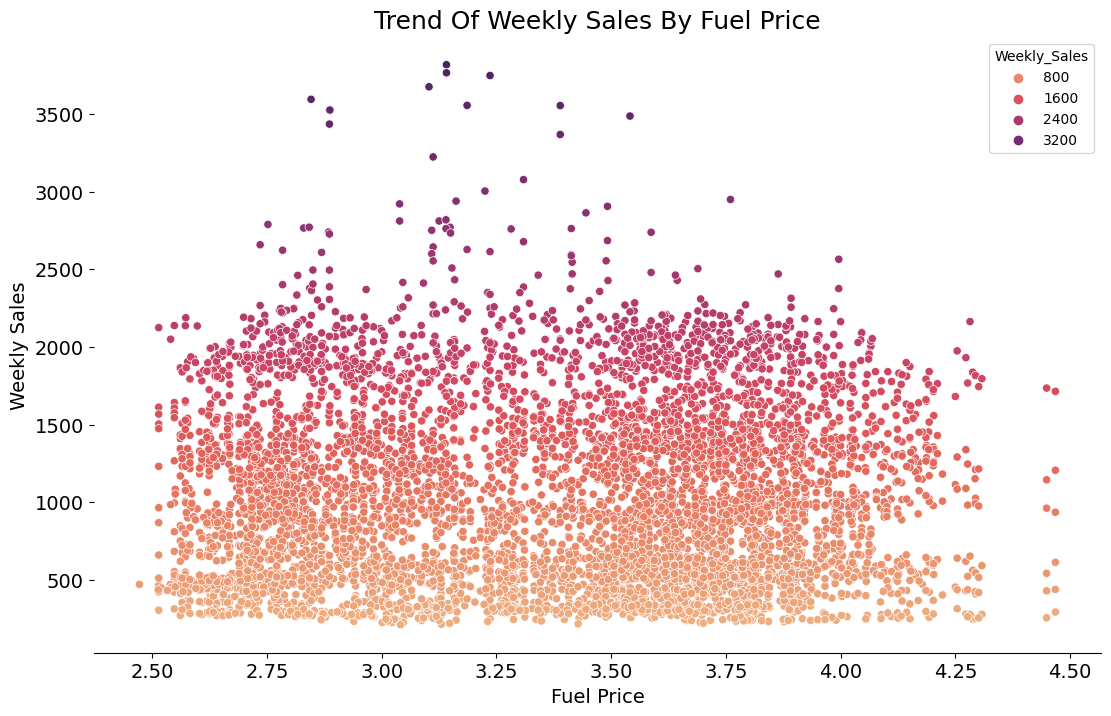

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales',hue='Weekly_Sales',palette='flare')
plt.xlabel('Fuel Price',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.title('Trend Of Weekly Sales By Fuel Price',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
plt.savefig('sales with fuel.png',bbox_inches='tight',facecolor='white')
plt.show()

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


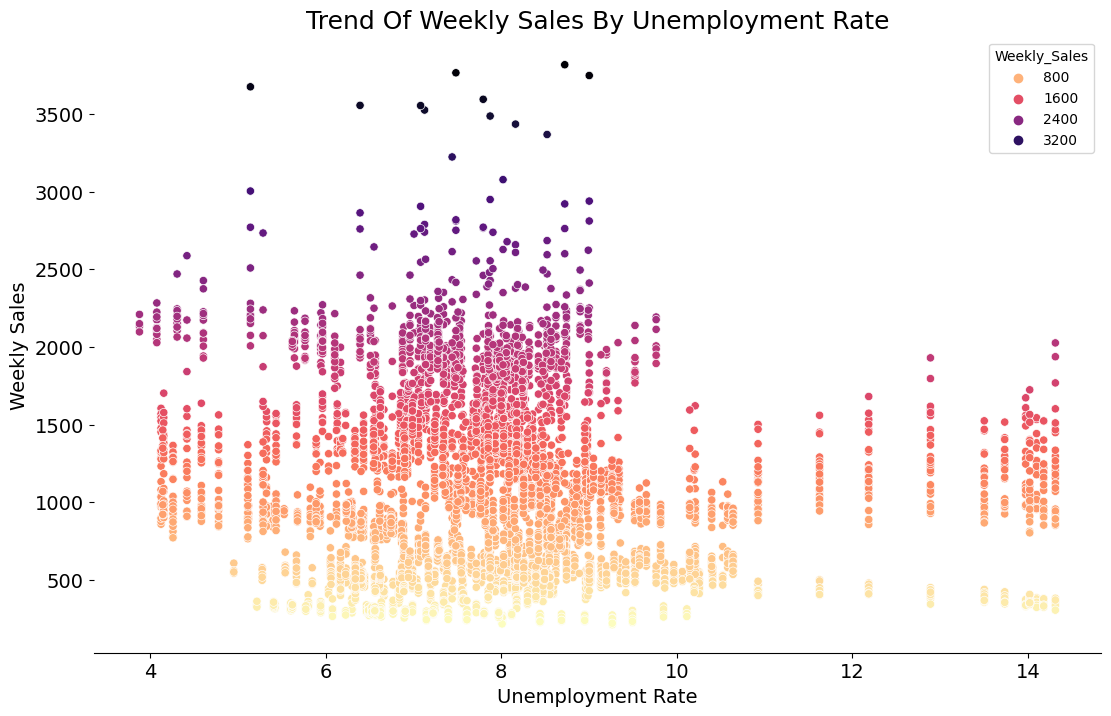

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales',hue='Weekly_Sales',palette='magma_r')
plt.xlabel('Unemployment Rate',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.title('Trend Of Weekly Sales By Unemployment Rate',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
plt.savefig('sales with unemp.png',bbox_inches='tight',facecolor='white')
plt.show()